# **Titanic Dataset - Exploratory Data Analysis (EDA)**

## What is EDA?
**Exploratory Data Analysis (EDA)** is like being a detective with data. Before building any machine learning model, we need to:
- **Understand** what our data looks like
- **Find patterns** and relationships
- **Spot problems** like missing values or outliers
- **Create new features** that might help our model

Think of it as getting to know your data before asking it to make predictions!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Why do EDA?
* **Model Building** - Understanding data helps build better models
* **Analysis and Reporting** - Find business insights and tell stories with data
* **Validate Assumptions** - Check if your hunches about the data are correct
* **Handling Missing Values** - Decide how to deal with incomplete information
* **Feature Engineering** - Create new, more useful variables
* **Detecting Outliers** - Find unusual data points that might be errors

**Note: Remember it is an Iterative Process** - You'll go back and forth between these steps!

In [2]:
# Load the training data only (avoid data leakage from test set)
df = pd.read_csv('train.csv')

**What is Data Leakage?**
- Using information that won't be available when making real predictions
- Like cheating on an exam by seeing the answers beforehand

**Why we only use train.csv:**
- Test.csv doesn't have survival labels (that's what we want to predict!)
- Mixing train and test data would give us false insights
- In real life, you won't have the answers for new data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Column Types (Data Types)

Understanding what type of data we have helps us choose the right analysis methods:

* **Numerical (Numbers)** - Age, Fare, PassengerId
  - We can calculate averages, plot histograms, find correlations

* **Categorical (Categories/Labels)** - Survived, Pclass, Sex, SibSp, Parch, Embarked  
  - We count frequencies, make bar charts, calculate proportions

* **Mixed (Text + Numbers)** - Name, Ticket, Cabin
  - Need special handling to extract useful information

## Univariate Analysis

**What is Univariate Analysis?**
- "Uni" = One, so we look at **ONE variable at a time**
- Like examining each ingredient separately before making a recipe

**Goals:**
1. **Understand distribution** → See how a single variable is spread (mean, median, mode, skewness, outliers)
2. **Detect patterns/issues** → Identify anomalies, missing values, or unusual behavior in one variable  
3. **Prepare for further analysis** → Build intuition before moving to bivariate/multivariate analysis

### **What is Distribution?**

* **Distribution** means **how data values are spread or arranged**
* It shows the **frequency** of different values in a dataset
* **Example:** Exam scores where most students score around 70 → the data is "centered" around 70

---

### **Key Concepts in Distribution**

**1. Central Tendency** → The "center" of data

   * **Mean**: Average (add all values ÷ count)
   * **Median**: Middle value when sorted
   * **Mode**: Most frequent value

**2. Dispersion (Spread)** → How far data points are from the center

   * **Range**: Max – Min
   * **Variance/Standard Deviation**: Average distance from the mean

**3. Shape of Distribution**

   * **Normal Distribution**: Bell-shaped, symmetric (like height, IQ)
   * **Skewed Distribution**: Tilted left (negative skew) or right (positive skew)
   * **Uniform Distribution**: All values equally likely (like rolling a die)

**4. Kurtosis**

   * Measures how "peaked" or "flat" the curve is

**5. Outliers**

   * Extreme values far from the rest of the data

### **Steps for Numerical Columns**

**Descriptive Statistics** is actually the **first step** when doing univariate analysis for **numerical columns**:

## **Descriptive Statistics in Univariate Analysis (Numerical Data)**

* **Definition**: Summarizing data using key numerical measures to describe its main features
* **Why**: Gives a quick snapshot of distribution before visualizations

**The Process:**

**1. Check Summary Statistics**
   * Mean, Median, Mode
   * Min, Max, Range  
   * Variance, Standard Deviation
   * Percentiles/Quartiles (25%, 50%, 75%)

**2. Visualize Distribution**
   * **Histogram** → overall spread and shape
   * **Boxplot** → outliers, quartiles
   * **Density Plot (KDE)** → smooth curve of distribution

**3. Check Shape of Distribution**
   * Normal, Skewed (left/right), Uniform
   * Skewness & Kurtosis values

**4. Identify Outliers**
   * Boxplot or IQR method (Q1–1.5*IQR, Q3+1.5*IQR)
   * Z-score method

**5. Handle Issues if Needed**
   * Missing values (impute/drop)
   * Transformations (log/sqrt for skewed data)

👉 **Flow: Descriptive statistics → Visualization → Shape → Outliers → Fix/Prepare**%%


### Age Analysis

In [4]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


**Understanding .describe() output:**
- **count**: How many non-missing values (714 out of 891 total)
- **mean**: Average age (29.7 years)
- **std**: Standard deviation (how spread out the ages are)
- **min/max**: Youngest (0.42) and oldest (80) passengers
- **25%, 50%, 75%**: Quartiles (25% of people are younger than 20.1, etc.)

<Axes: ylabel='Frequency'>

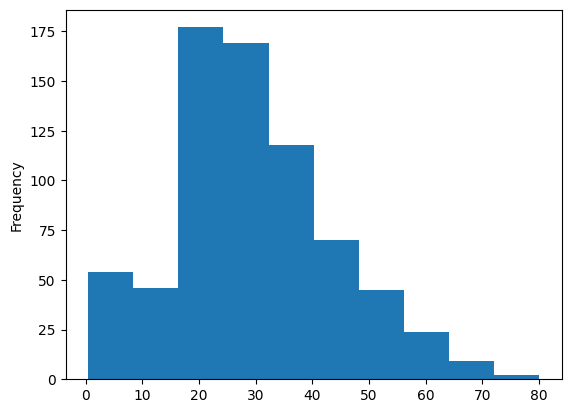

In [5]:
df['Age'].plot(kind='hist')

**Reading the Histogram:**
- **X-axis**: Age values
- **Y-axis**: How many people in each age range
- **Shape**: Looks roughly bell-shaped (normal distribution)
- **Peak**: Most passengers were in their 20s-30s

<Axes: ylabel='Density'>

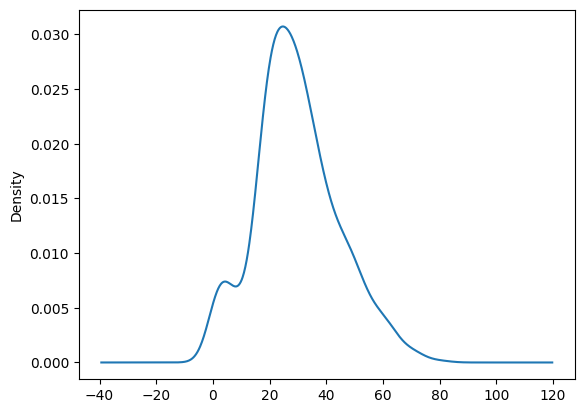

In [6]:
df['Age'].plot(kind='kde')

**What is KDE (Kernel Density Estimation)?**
- KDE creates a **smooth curve** instead of bars
- Shows the same information as histogram but smoother
- Easier to see the overall shape of the distribution
- The curve shows where most of the data is concentrated

In [7]:
df['Age'].skew()

np.float64(0.38910778230082704)

### **Understanding Skewness: `df['Age'].skew()`**

**What it does**: Calculates the **skewness** of the `Age` column

**Skewness Meaning:**
* Measures **asymmetry** of the data distribution around the mean
* **Value near 0** → roughly symmetric (normal distribution)
* **Positive skew (>0)** → Tail on the right (more small values, few large ones)
  - Example: Most people are young, few are very old
* **Negative skew (<0)** → Tail on the left (more large values, few small ones)

**Our result (~0.39)**: Slightly positive skew
- Most passengers were younger
- Few very elderly passengers

👉 **Use in EDA**: Helps decide if data needs **transformation (log, sqrt, box-cox)** for normalization


<Axes: >

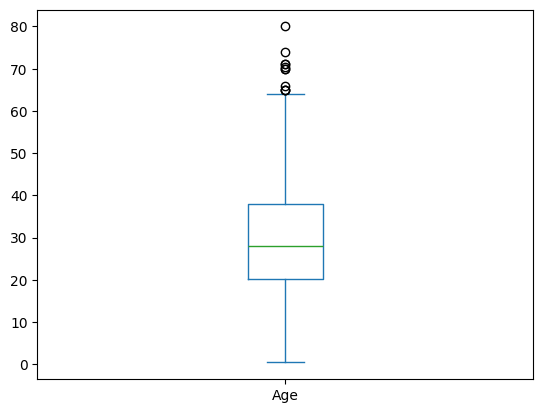

In [8]:
df['Age'].plot(kind='box')

**Reading a Box Plot:**
- **Box**: Contains 50% of the data (from 25th to 75th percentile)
- **Line in box**: Median (middle value)
- **Whiskers**: Extend to show the range of most data
- **Dots beyond whiskers**: Outliers (unusual values)

**What we see**: A few elderly passengers are outliers (above ~65 years)


In [9]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


**Investigating Outliers:**
- We found passengers older than 65 (our outlier threshold)
- These aren't errors - just elderly passengers
- In the Titanic context, these are legitimate values to keep


In [10]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

**Missing Data Check:**
- **Result**: ~20% of Age data is missing
- **This is important!** We'll need to handle this before modeling
- **Options**: Remove rows, fill with average, or use advanced imputation

### Age Analysis - **Conclusions**
* ✅ Age is almost normally distributed (good for modeling)
* ⚠️ 20% of the age values are missing (need to handle this)
* 👀 There are some outliers (elderly passengers - but they're valid data)


### Fare Analysis

In [12]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


**Fare Statistics Insights:**
- **Wide range**: From free (£0) to very expensive (£512)
- **Mean vs Median**: Mean (£32.2) > Median (£14.5) suggests positive skew
- **This suggests**: Few people paid very high fares, most paid moderate amounts


<Axes: ylabel='Frequency'>

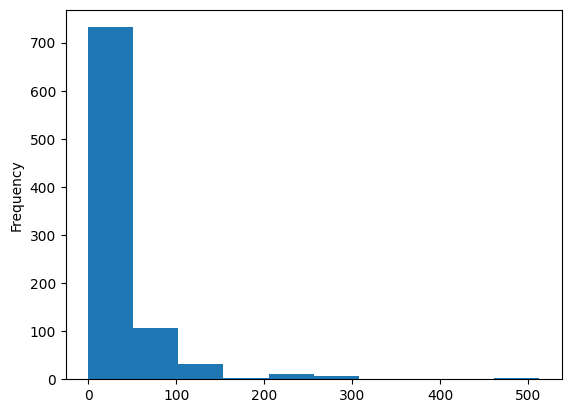

In [13]:
df['Fare'].plot(kind='hist')

**Fare Histogram Insights:**
- **Highly right-skewed**: Most passengers paid low fares
- **Long tail**: Few passengers paid very high fares
- **Business insight**: Majority were likely 3rd class passengers


<Axes: ylabel='Density'>

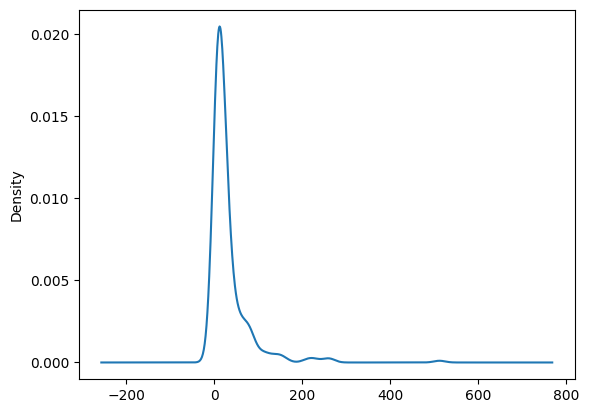

In [14]:
df['Fare'].plot(kind='kde')

In [15]:
df['Fare'].skew()

np.float64(4.787316519674893)

**Skewness = 4.79 (Very High Positive Skew)**
- **Normal distribution skew ≈ 0**
- **Our skew = 4.79**: Extremely right-skewed
- **Meaning**: Very few high-fare passengers, many low-fare passengers


<Axes: >

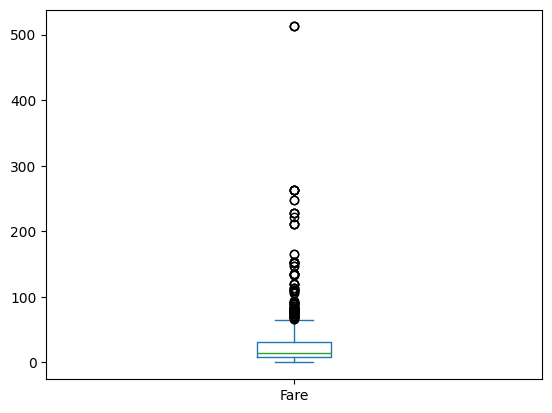

In [16]:
df['Fare'].plot(kind='box')

**Box Plot Shows:**
- **Many outliers**: Passengers who paid much higher fares
- **Compressed main box**: Most fares were in a narrow, low range  
- **Long whisker**: Shows the extreme skewness


In [17]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**High Fare Investigation:**
- These are likely 1st class passengers or families traveling together
- **Important discovery**: Some tickets might be for multiple people!
- This explains why some fares are so high

In [18]:
df['Fare'].isnull().sum()

np.int64(0)

**Good news**: No missing fare data to worry about!

### Fare Analysis - **Conclusions**
* ⚠️ The data is highly skewed (positively) - most paid low fares
* 🎯 Fare column actually contains **group fare** and not individual fare (This might be an issue for modeling)
* 💡 We need to create a new column called **individual_fare** by dividing by family size


## Categorical Variables Analysis

**What's Different for Categorical Data?**

Categorical columns contain **labels or groups** (like Gender, City, Department). The goal is to understand **how often each category appears** and whether the data is clean.

### **Steps for Categorical Analysis:**

**1. Frequency Counts**
   * Count how many times each category appears
   * Example: Male – 60, Female – 40

**2. Mode & Uniqueness**
   * Find the most common category (mode)
   * Check how many unique categories exist

**3. Visualizations**
   * **Bar Chart** → Compare category counts
   * **Pie Chart** → Show proportions

**4. Check for Issues**
   * Rare categories (too few samples)
   * Inconsistent labels ("Male" vs "male")
   * Missing values

**5. Clean/Prepare if Needed**
   * Merge or group rare categories
   * Standardize labels
   * Encode categories for ML models later

👉 **Flow: Counts → Mode → Visuals → Issues → Fix**


### Survived (Target Variable)

In [19]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


**Reading Value Counts:**
- **0 = Did not survive**: 549 passengers
- **1 = Survived**: 342 passengers  
- **Survival rate**: 342/(342+549) = 38.4%
- **Key insight**: More people died than survived

<Axes: xlabel='Survived'>

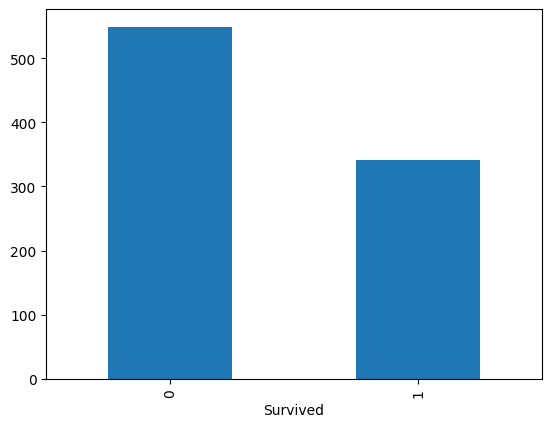

In [20]:
df['Survived'].value_counts().plot(kind='bar')

**Bar Chart Benefits:**
- **Visual comparison**: Easy to see the difference
- **Clear labels**: 0 vs 1 on x-axis
- **Quick insight**: Death rate was higher than survival rate


<Axes: ylabel='count'>

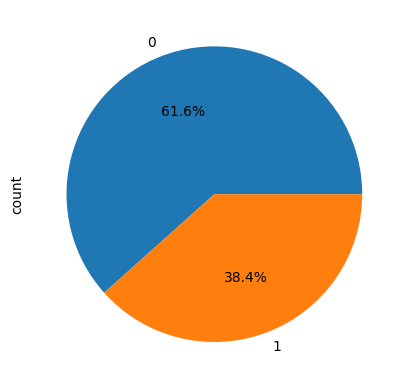

In [21]:
df['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')

**Pie Chart Benefits:**
- **Shows proportions**: Automatically calculates percentages
- **Visual impact**: Easy to see the ~60-40 split
- **Good for presentations**: Clear story about survival rates


In [22]:
df['Survived'].isnull().sum()

np.int64(0)

**Perfect!** No missing values in our target variable.

### Passenger Class (Pclass)

In [23]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


**Class Distribution:**
- **3rd Class**: 491 passengers (most common - cheapest tickets)
- **1st Class**: 216 passengers (wealthy passengers)  
- **2nd Class**: 184 passengers (middle class)
- **Business insight**: Most passengers were lower class

<Axes: xlabel='Pclass'>

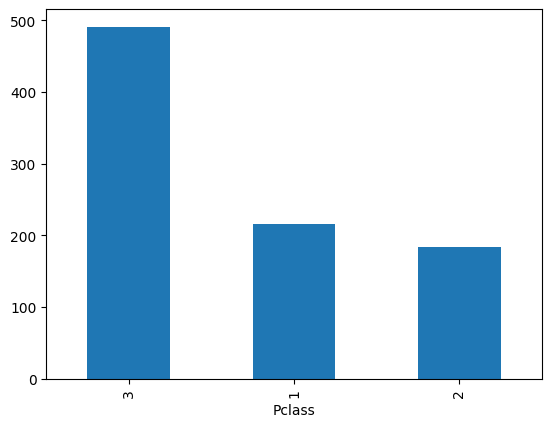

In [24]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

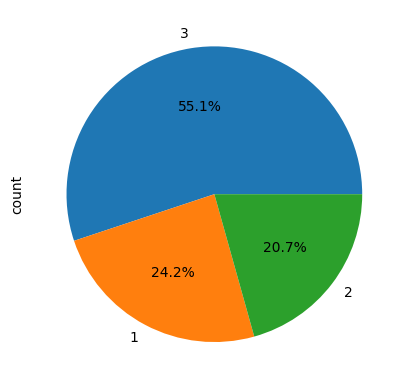

In [25]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Embarkation Port (Embarked)

In [26]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


**Embarkation Ports:**
- **S = Southampton**: 644 passengers (most common)
- **C = Cherbourg**: 168 passengers  
- **Q = Queenstown**: 77 passengers
- **Missing**: 2 passengers (very small amount)

<Axes: xlabel='Embarked'>

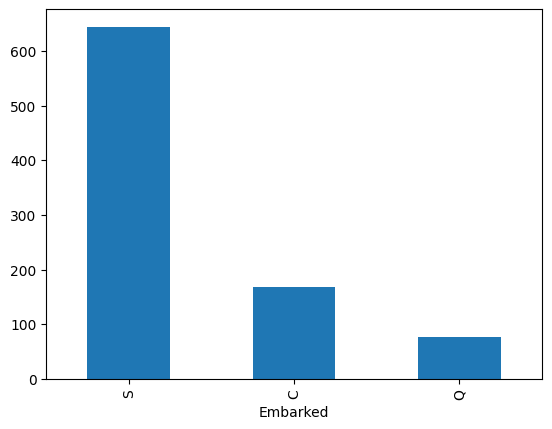

In [27]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

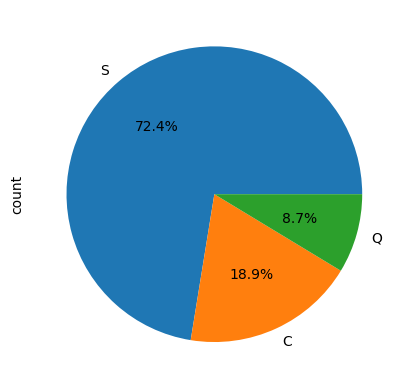

In [28]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%')

> **Next Step**: Need to do Feature Engineering on the mixed columns (Name, Ticket, Cabin) to extract more insights!

## Feature Engineering Section

**What is Feature Engineering?**
- **Creating new, more useful variables** from existing data
- **Like cooking**: Taking raw ingredients and making them more useful
- **Goal**: Help our machine learning model understand patterns better

**Why do we need it for Titanic?**
- Some columns like "Name" contain hidden information (titles like Mr, Mrs)
- "Fare" might be for groups, not individuals
- Family relationships might affect survival

### Creating Family-Related Features

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [30]:
# we get percentage of how many people survived or not in each class(1 for survived and 0 for died)
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

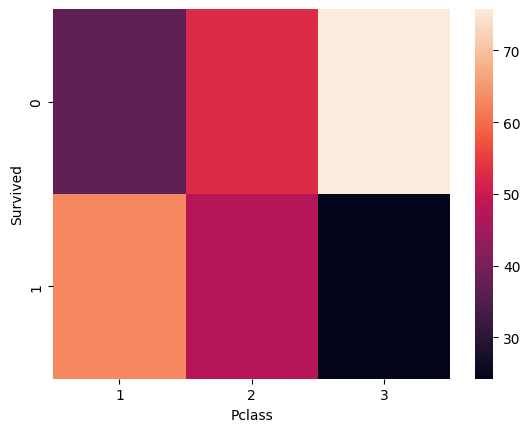

In [31]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [32]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

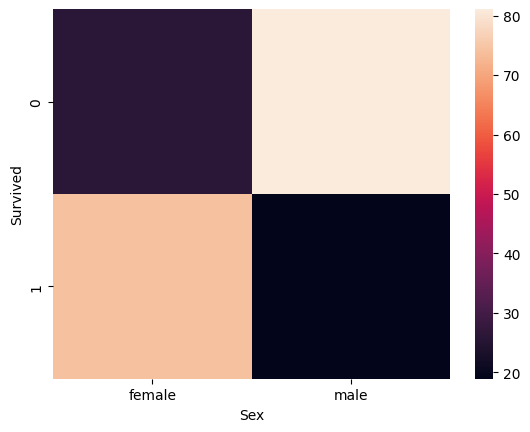

In [33]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

In [34]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

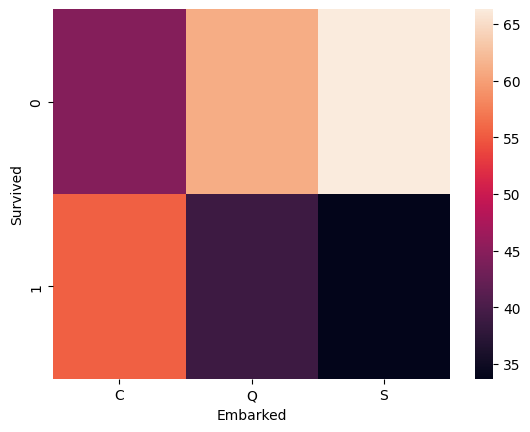

In [35]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100)

In [36]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [37]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


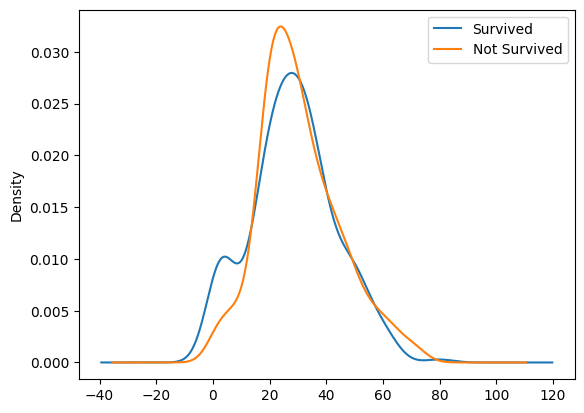

In [38]:
# relationship b/w survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [39]:
df[df['Pclass'] == 1]['Age'].mean()

np.float64(38.233440860215055)

In [40]:
# Feature Engineering on Fare Column

In [30]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


**SibSp = Siblings/Spouses aboard**
- Most passengers (608) traveled alone or without siblings/spouses
- Some families traveled together
- One person had 8 siblings/spouses!

In [31]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Investigating the Large Family:**
Let's see who traveled with 8 siblings/spouses

In [32]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**Discovery**: Multiple passengers share the same ticket!
- This confirms our suspicion about group fares
- Families often bought one ticket together

In [33]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


**The Sage Family**: A large family traveling together
- This explains the high SibSp count
- Confirms that fare was likely split among family members

In [35]:
# Create family size feature
df['family_size'] = df['SibSp'] + df['Parch'] + 1

**Family Size Logic:**
- **SibSp**: Siblings/Spouses
- **Parch**: Parents/Children  
- **+1**: The passenger themselves
- **Result**: Total family members traveling together

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [37]:
# family_type
# 1 -> alone
# 2-4 -> small
# 5 -> large

# Create family type categories
def transform_family_size(num):
  """
  Categorize family size into meaningful groups
  """
  if num == 1:
    return 'alone'
  elif num > 1 and num < 5:
    return 'small'
  else:
    return 'large'

**Family Type Logic:**
- **Alone (1)**: Solo travelers
- **Small (2-4)**: Small families
- **Large (5+)**: Large families
- **Hypothesis**: Different family sizes might have different survival rates


In [38]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,small
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,alone


family_type,alone,large,small
Survived,,,
0,69.646182,83.870968,42.123288
1,30.353818,16.129032,57.876712


<Axes: xlabel='family_type', ylabel='Survived'>

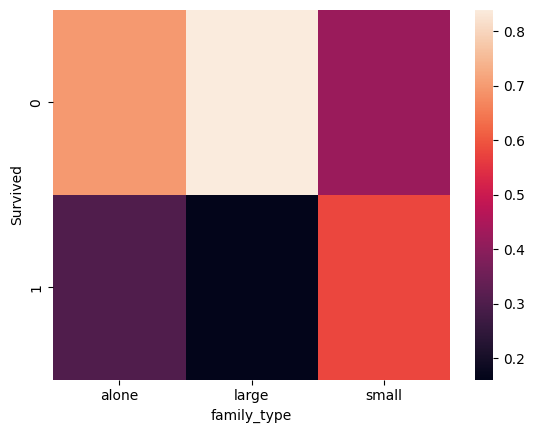

In [41]:
sns.heatmap(pd.crosstab(df['Survived'],df['family_type'],normalize='columns'))

In [42]:
# Extract surname (family name)
df['Surname'] = df['Name'].str.split(',').str.get(0)

**Surname Extraction:**
- **Pattern**: Names are formatted as "Surname, Title. First Name"
- **Method**: Split by comma, take the first part
- **Use**: Could help identify family groups


In [43]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [44]:
# Extract title from names
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split('.').str.get(0)

**Title Extraction Process:**
1. **Split by comma**: Get the part after surname
2. **Strip whitespace**: Remove extra spaces
3. **Split by period**: Get the part before the period
4. **Result**: Titles like "Mr", "Mrs", "Miss", "Master"

**Why titles matter**:
- Show social status and age group
- "Master" = young boy, "Miss" = unmarried woman, etc.


In [87]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,Surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware,Mr


In [45]:
# This should be df['title'].value_counts() - missing parentheses
df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


**Title Distribution:**
- **Mr**: Adult men (most common)
- **Miss**: Unmarried women  
- **Mrs**: Married women
- **Master**: Young boys
- **Rare titles**: Rev, Dr, Col, etc. (small numbers)


<Axes: xlabel='title'>

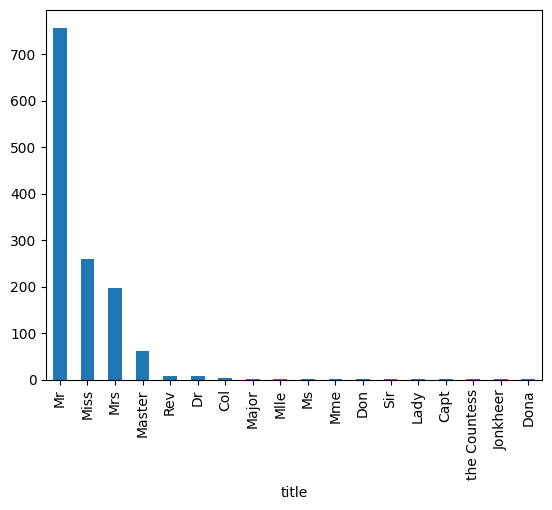

In [90]:
df['title'].value_counts.plot(kind='bar')

### Extracting Cabin Information

In [95]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

np.float64(0.774637127578304)

**Cabin Data Issue:**
- **77% missing!** Most passengers don't have cabin information
- **Strategy**: Extract what we can, fill missing intelligently


In [46]:
df['Cabin'].value_counts().head()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3


**Cabin Pattern Analysis:**
- Cabins start with letters (A, B, C, etc.) - these are **deck levels**
- Numbers follow - these are **room numbers**
- **Strategy**: Extract deck information as it might correlate with class/survival


In [47]:
# Fill missing cabins with 'M' for Missing
df['Cabin'].fillna('M',inplace=True)

/tmp/ipython-input-3976388287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace=True)


In [48]:
df['Cabin'].value_counts()

,count
Cabin,
M,687
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
...,...
E17,1
A24,1
C50,1


In [49]:
# Extract deck (first letter of cabin)
df['Deck'] = df['Cabin'].str[0]

**Deck Extraction:**
- **Deck levels**: A, B, C, D, E, F, G, T
- **M**: Missing cabin information
- **Hypothesis**: Higher decks (A, B, C) might be safer/for upper class


In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type,Surname,title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,small,Braund,Mr,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small,Cumings,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,alone,Heikkinen,Miss,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small,Futrelle,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,alone,Allen,Mr,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,1,alone,Montvila,Rev,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,alone,Graham,Miss,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,M,S,4,small,Johnston,Miss,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,alone,Behr,Mr,C


In [51]:
df['Deck'].value_counts()

,count
Deck,
M,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


**Deck Distribution:**
- **M (Missing)**: Most common - no cabin info
- **C, B, D**: Relatively common decks
- **A, E, F, G**: Less common
- **T**: Very rare (might be special cabin)


## Bivariate Analysis

**What is Bivariate Analysis?**
- **"Bi" = Two**, so we look at **TWO variables at a time**
- **Goal**: Understand **relationships** between variables
- **Example**: Does passenger class affect survival? Do men and women survive differently?
### **Types of Bivariate Analysis:**

**1. Categorical ↔ Categorical**
   * Cross-tabulation (crosstab)
   * Chi-square tests
   * Stacked bar charts

**2. Numerical ↔ Numerical**  
   * Correlation analysis
   * Scatter plots
   * Line plots

**3. Numerical ↔ Categorical**
   * Group statistics (mean by category)
   * Box plots by category
   * KDE plots by category

### **Steps to Perform Bivariate Analysis**

**1. Identify Variable Types**
   * What kind of variables are we comparing?

**2. Choose Summary Statistics**
   * Correlation, cross-tabs, group means

**3. Visualizations**
   * Appropriate charts for the variable types

**4. Interpret the Relationship**
   * Is there correlation, association, or difference?
   * Strong vs weak relationship?

**5. Check for Issues/Insights**
   * Outliers affecting relationships
   * Imbalanced categories

👉 **Flow: Identify Types → Summary Stats → Visualization → Interpret → Check Issues**


### Categorical vs Categorical Analysis

In [104]:
pd.crosstab(df['Deck'],df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


**Reading Cross-tabulation:**
- **Rows**: Survival (0=died, 1=survived)
- **Columns**: Passenger class (1, 2, 3)
- **Numbers**: Count of passengers in each combination
- **Example**: 80 first-class passengers died, 136 survived


In [52]:
# Normalize by columns to get percentages
pd.crosstab(df['Survived'],df['Deck'],normalize='columns')*100

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


**Understanding Normalized Cross-tab:**
- **normalize='columns'**: Shows percentage within each class
- **Key insight**:
  - 1st class: ~63% survived, ~37% died
  - 2nd class: ~47% survived, ~53% died  
  - 3rd class: ~24% survived, ~76% died
- **Conclusion**: Higher class = higher survival rate!


<Axes: xlabel='Deck'>

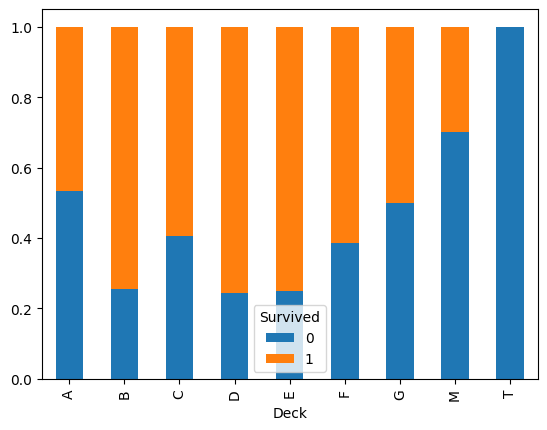

In [53]:
pd.crosstab(df['Deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

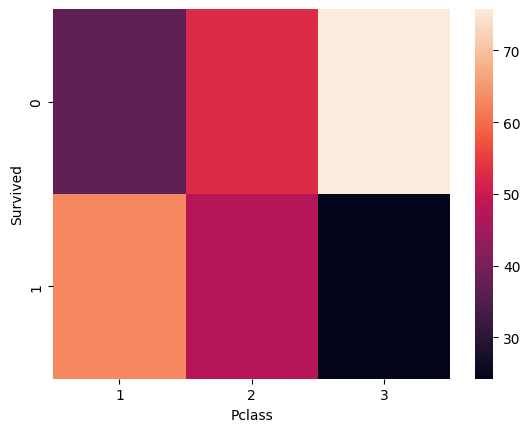

In [54]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

**Heatmap Visualization:**
- **Darker colors**: Higher percentages
- **Visual pattern**: Clear difference between classes
- **Easier to spot**: Patterns that numbers alone might miss


In [56]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


**Gender vs Survival:**
- **Females**: ~74% survived (very high!)
- **Males**: ~19% survived (very low!)
- **Key insight**: "Women and children first" policy was clearly followed


<Axes: xlabel='Sex', ylabel='Survived'>

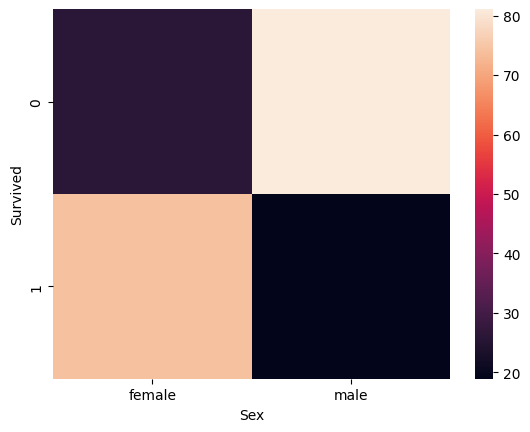

In [58]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

In [59]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


**Embarkation Port vs Survival:**
- **Cherbourg (C)**: ~55% survived
- **Queenstown (Q)**: ~39% survived  
- **Southampton (S)**: ~34% survived
- **Possible reasons**: Different class distributions from different ports


<Axes: xlabel='Embarked', ylabel='Survived'>

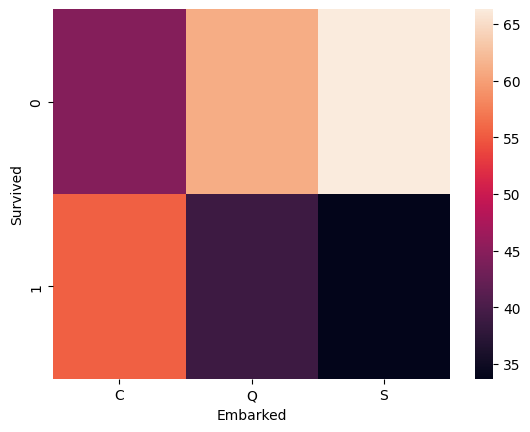

In [60]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100)

In [61]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


**Gender Distribution by Port:**
- Checking if gender ratios were different by embarkation port
- Helps us understand if port differences are due to gender composition


In [62]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


**Class Distribution by Port:**
- **Cherbourg**: Higher percentage of 1st class passengers
- **Southampton**: More 3rd class passengers
- **This explains**: Why Cherbourg had higher survival rates!


### Numerical vs Categorical Analysis

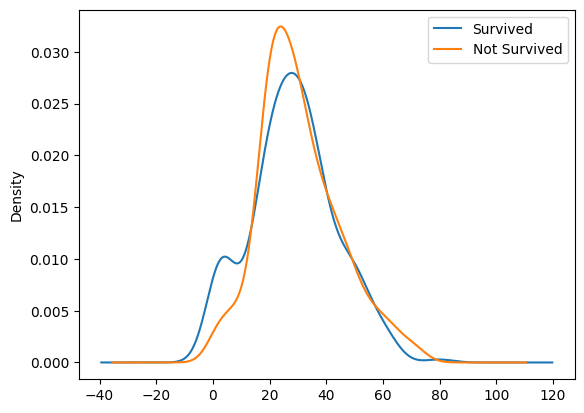

In [64]:
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

**Age vs Survival KDE Plot:**
- **Green line**: Age distribution of survivors
- **Blue line**: Age distribution of non-survivors
- **Observation**: Slight differences in age patterns
- **Children**: Appear to have better survival chances
- **Elderly**: Lower survival rates

In [66]:
# Calculate mean age by passenger class
for pclass in [1, 2, 3]:
    mean_age = df[df['Pclass'] == pclass]['Age'].mean()
    print(f"Average age in Class {pclass}: {mean_age:.1f} years")

Average age in Class 1: 38.2 years
Average age in Class 2: 29.9 years
Average age in Class 3: 25.1 years


**Age by Class Analysis:**
- Shows if different classes had different age distributions
- Helps understand passenger demographics by socioeconomic status

### Feature Engineering Results Analysis

In [67]:
# Analyze our new family_type feature
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0,69.646182,83.870968,42.123288
1,30.353818,16.129032,57.876712


**Family Type vs Survival:**
- **Small families**: Best survival rate
- **Alone**: Moderate survival rate  
- **Large families**: Worst survival rate
- **Insight**: Small families could help each other but weren't too large to manage


### Creating More Features from Names

In [68]:
df['Surname'] = df['Name'].str.split(',').str.get(0)

In [69]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split('.').str.get(0)

In [70]:
df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


### Deck Analysis

In [71]:
pd.crosstab(df['Deck'],df['Pclass'])

Pclass,1,2,3
Deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
M,40,168,479
T,1,0,0


**Deck vs Class Relationship:**
- Shows which decks were associated with which passenger classes
- Higher decks (A, B, C) likely for upper classes
- Lower decks (E, F, G) for lower classes

In [72]:
pd.crosstab(df['Survived'],df['Deck'],normalize='columns')*100

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


**Deck vs Survival:**
- Different decks had different survival rates
- Higher decks were likely safer (closer to lifeboats)
- Missing cabin info (M) shows lower survival - probably 3rd class passengers


<Axes: xlabel='Deck'>

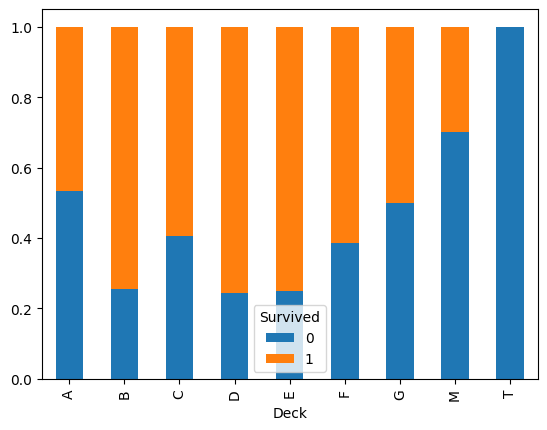

In [73]:
pd.crosstab(df['Deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

**Stacked Bar Chart:**
- **normalize='index'**: Shows percentage within each deck
- **Stacked**: Died (bottom) + Survived (top) = 100% for each deck
- **Visual pattern**: Easy to compare survival rates across decks


### Correlation Analysis (Numerical Variables)


<Axes: >

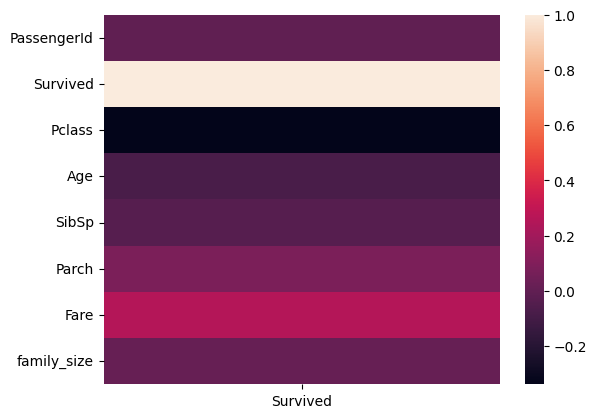

In [74]:
sns.heatmap(df.select_dtypes(include=np.number).corr()['Survived'].to_frame())

**Correlation with Survival:**
- **Positive correlation**: Higher values = higher survival chance
- **Negative correlation**: Higher values = lower survival chance
- **Close to 0**: Little to no linear relationship
- **Values range from -1 to +1**: Stronger correlation closer

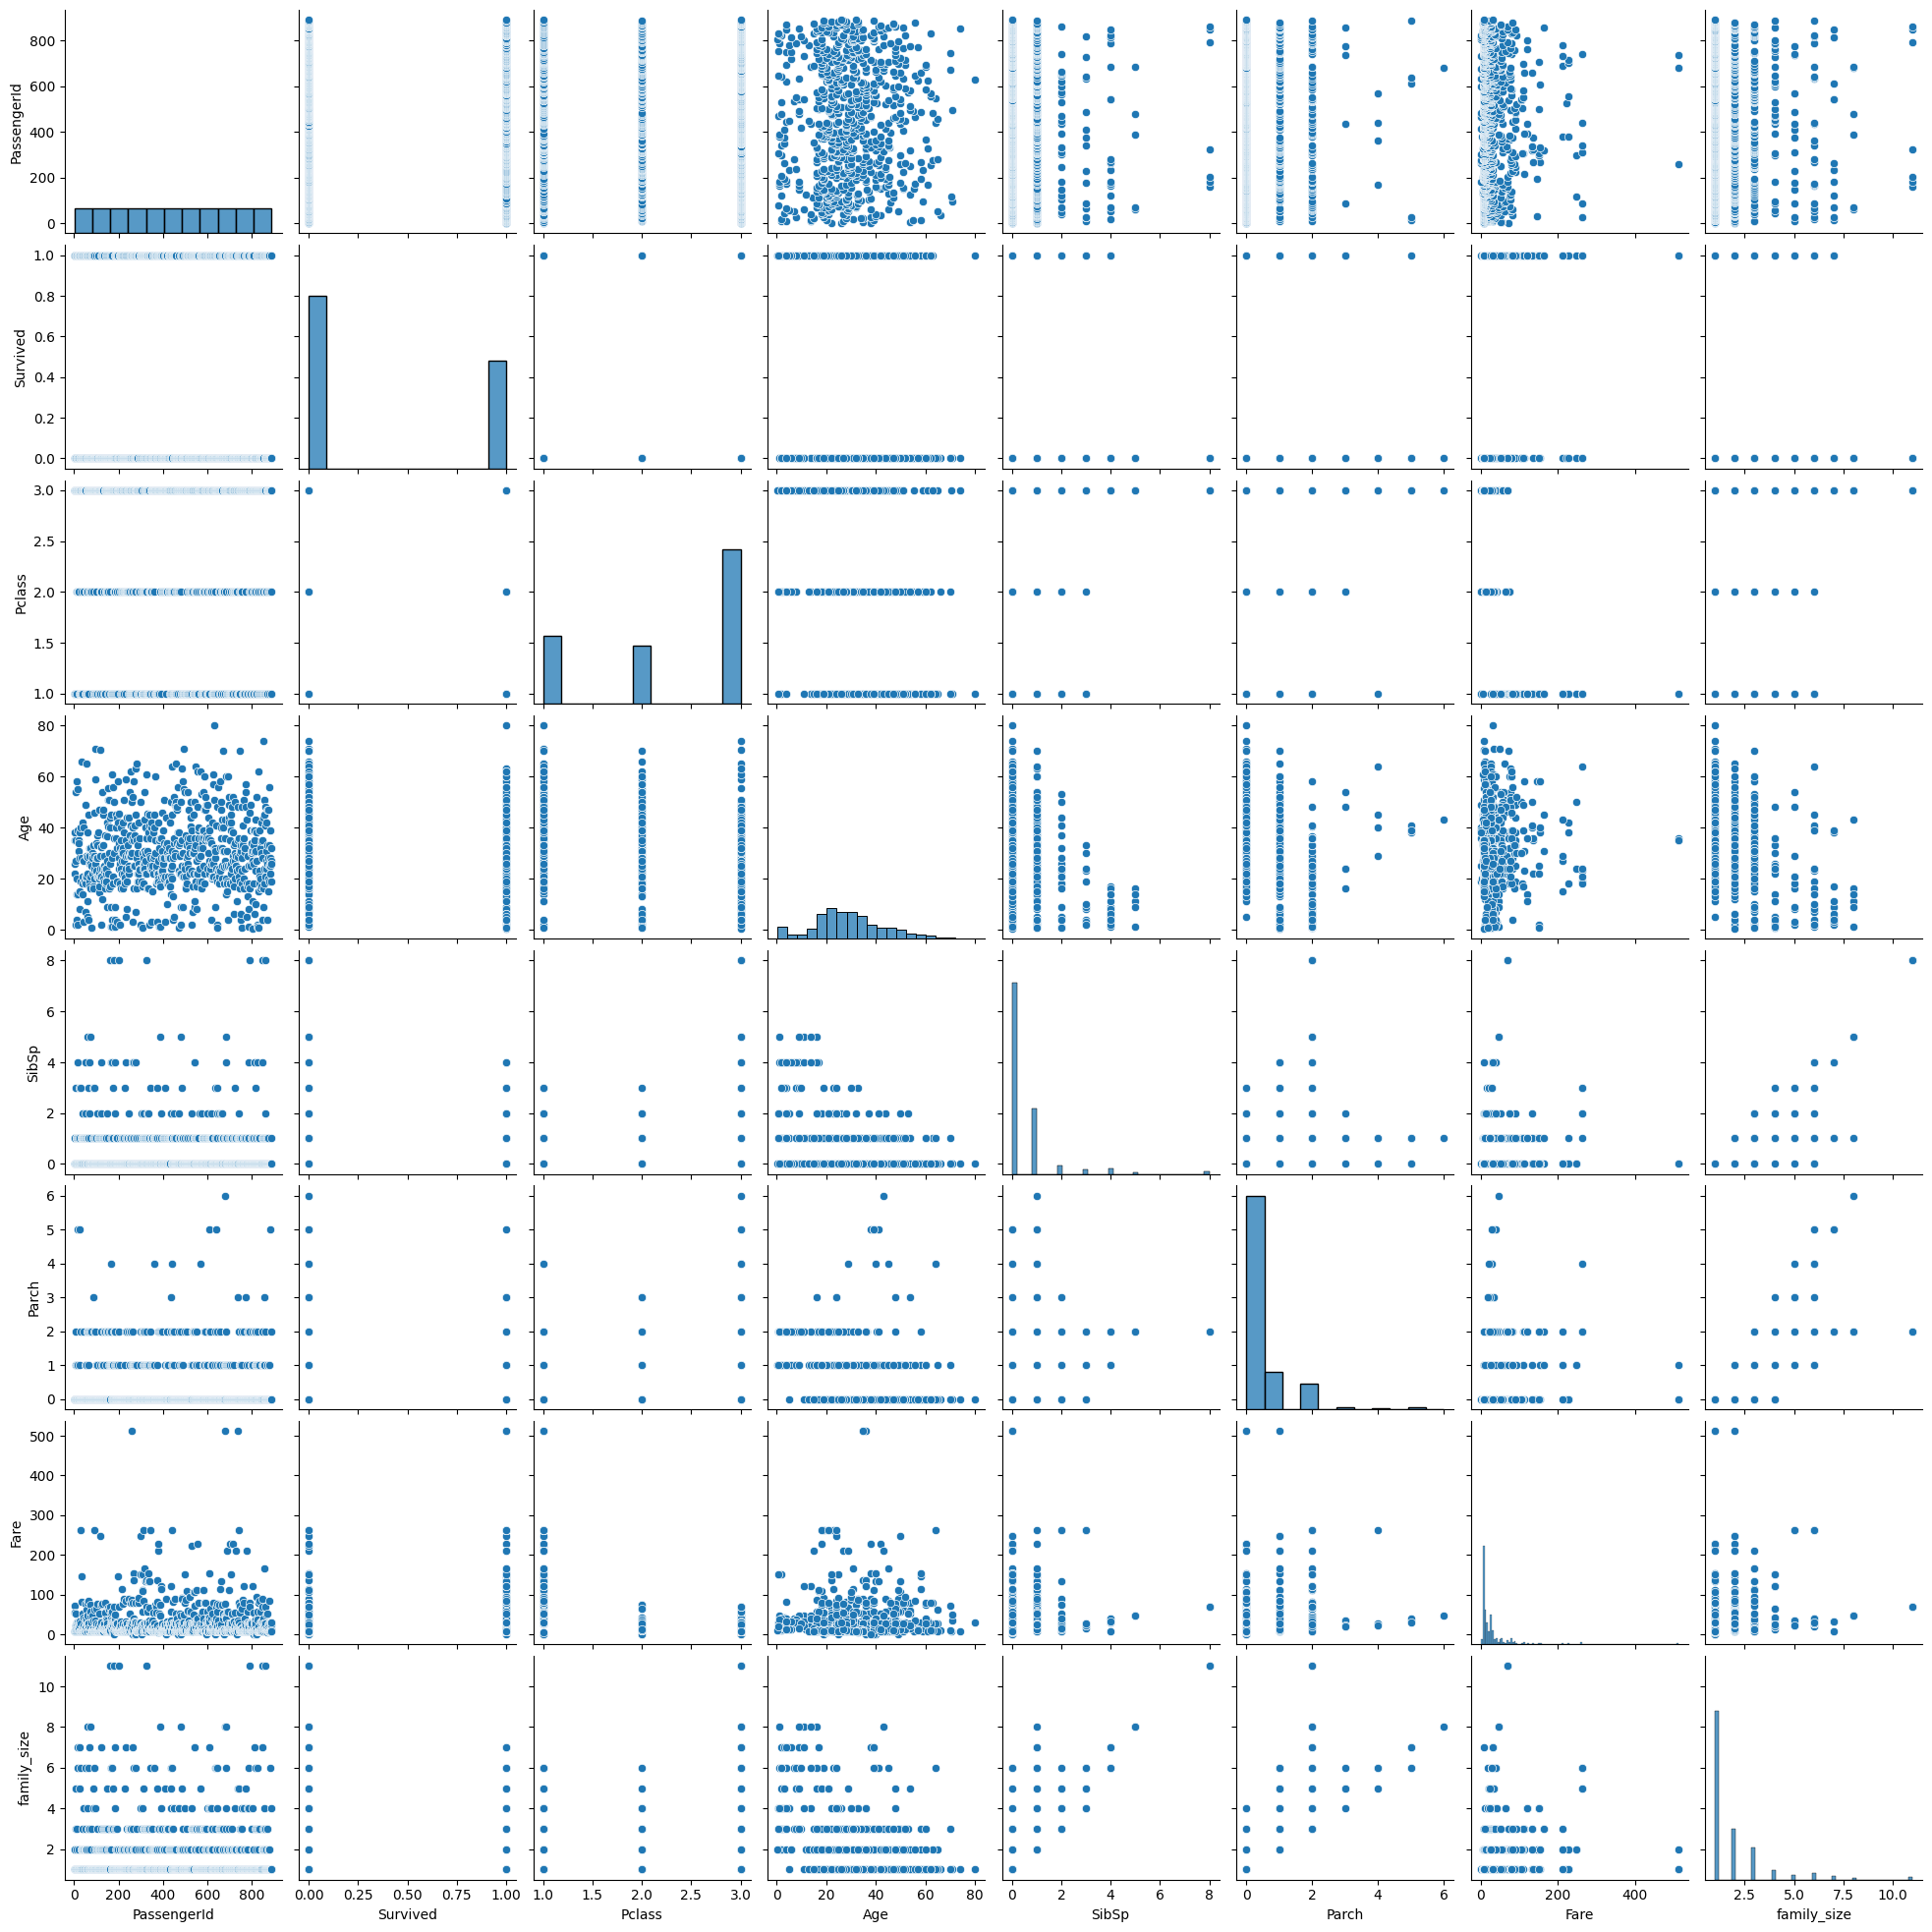

In [75]:
sns.pairplot(df)